In [47]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
folder_path = 'C:/Users/dmitri.iolchin/1_NAT/CA2/reddit'  # folder path containing Excel files

concatenated_df = pd.DataFrame(columns=["Author", "Date", "Votes UP", "Votes Down", "Score", "Message"])

# Iterate through files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx'):  # Process only Excel files
        file_path = os.path.join(folder_path, file_name)
        
        # Read Excel file into a DataFrame
        df = pd.read_excel(file_path, header=None)
        
        # Set the first row as column names
        df.columns = df.iloc[6]
        df = df.iloc[7:]
        df = df.iloc[:,2:-2]
        df = df.reset_index(drop=True)
        
        # Print DataFrame after changing column names (for demonstration)
        concatenated_df = pd.concat([concatenated_df, df], ignore_index=True)

In [49]:
concatenated_df.to_csv('sentiment.csv', index=False)

In [50]:
df = pd.read_csv('sentiment.csv')

In [51]:
df.head(5)

,Author,Date,Votes UP,Votes Down,Score,Message
0,MoBhollix,2023-02-01 09:25:24,0,0,0,Is Ireland doing better at public transport th...
1,MoBhollix,2023-02-01 09:28:17,19,0,19,Our public transport is actually pretty good w...
2,Ok-Fly5271,2023-02-01 09:30:03,37,0,37,Anyone remember when journalists used to go af...
3,crlthrn,2023-02-01 09:34:05,16,0,16,Better to compare to countries that have outst...
4,MoBhollix,2023-02-01 09:39:21,23,0,23,"Exactly, this is corporate journalism. This gu..."


In [52]:
df.shape

(3290, 6)

In [53]:
df['word_count'] = df['Message'].apply(lambda x: len(str(x).split(" ")))

In [54]:
df[['Message','word_count']].head()

,Message,word_count
0,Is Ireland doing better at public transport th...,10
1,Our public transport is actually pretty good w...,35
2,Anyone remember when journalists used to go af...,18
3,Better to compare to countries that have outst...,35
4,"Exactly, this is corporate journalism. This gu...",43


In [55]:
df['char_count'] = df['Message'].str.len() 

In [56]:
## this also includes spaces
df[['Message','char_count']].head()

,Message,char_count
0,Is Ireland doing better at public transport th...,60
1,Our public transport is actually pretty good w...,169
2,Anyone remember when journalists used to go af...,110
3,Better to compare to countries that have outst...,210
4,"Exactly, this is corporate journalism. This gu...",245


In [57]:
df.head(5)

,Author,Date,Votes UP,Votes Down,Score,Message,word_count,char_count
0,MoBhollix,2023-02-01 09:25:24,0,0,0,Is Ireland doing better at public transport th...,10,60
1,MoBhollix,2023-02-01 09:28:17,19,0,19,Our public transport is actually pretty good w...,35,169
2,Ok-Fly5271,2023-02-01 09:30:03,37,0,37,Anyone remember when journalists used to go af...,18,110
3,crlthrn,2023-02-01 09:34:05,16,0,16,Better to compare to countries that have outst...,35,210
4,MoBhollix,2023-02-01 09:39:21,23,0,23,"Exactly, this is corporate journalism. This gu...",43,245


In [58]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

In [59]:
df['Message'] = df['Message'].astype(str)

In [60]:
df['avg_word'] = df['Message'].apply(lambda x: avg_word(x))

In [61]:
df[['Message','avg_word']].head()

,Message,avg_word
0,Is Ireland doing better at public transport th...,5.100000
1,Our public transport is actually pretty good w...,3.857143
2,Anyone remember when journalists used to go af...,5.166667
3,Better to compare to countries that have outst...,5.176471
4,"Exactly, this is corporate journalism. This gu...",4.720930


In [62]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dmitri.iolchin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [64]:
df['stopwords'] = df['Message'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['Message','stopwords']].head()

,Message,stopwords
0,Is Ireland doing better at public transport th...,4
1,Our public transport is actually pretty good w...,17
2,Anyone remember when journalists used to go af...,8
3,Better to compare to countries that have outst...,12
4,"Exactly, this is corporate journalism. This gu...",22


In [65]:
df['hastags'] = df['Message'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
df[['Message','hastags']].head()

,Message,hastags
0,Is Ireland doing better at public transport th...,0
1,Our public transport is actually pretty good w...,0
2,Anyone remember when journalists used to go af...,0
3,Better to compare to countries that have outst...,0
4,"Exactly, this is corporate journalism. This gu...",0


In [66]:
df['numerics'] = df['Message'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df[['Message','numerics']].head()

,Message,numerics
0,Is Ireland doing better at public transport th...,0
1,Our public transport is actually pretty good w...,0
2,Anyone remember when journalists used to go af...,0
3,Better to compare to countries that have outst...,0
4,"Exactly, this is corporate journalism. This gu...",0


In [67]:
df['upper'] = df['Message'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df[['Message','upper']].head()

,Message,upper
0,Is Ireland doing better at public transport th...,0
1,Our public transport is actually pretty good w...,1
2,Anyone remember when journalists used to go af...,0
3,Better to compare to countries that have outst...,1
4,"Exactly, this is corporate journalism. This gu...",0


In [68]:
df['Message'] = df['Message'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Message'].head()

0    is ireland doing better at public transport th...
1    our public transport is actually pretty good w...
2    anyone remember when journalists used to go af...
3    better to compare to countries that have outst...
4    exactly, this is corporate journalism. this gu...
Name: Message, dtype: object

In [69]:
df['Message'] = df['Message'].str.replace('[^\w\s]','')
df['Message'].head()

0    is ireland doing better at public transport th...
1    our public transport is actually pretty good w...
2    anyone remember when journalists used to go af...
3    better to compare to countries that have outst...
4    exactly, this is corporate journalism. this gu...
Name: Message, dtype: object

In [70]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Message'] = df['Message'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Message'].head()

0             ireland better public transport thought?
1    public transport actually pretty good compare ...
2    anyone remember journalists used go government...
3    better compare countries outstanding systems. ...
4    exactly, corporate journalism. guy reason, he'...
Name: Message, dtype: object

In [71]:
freq = pd.Series(' '.join(df['Message']).split()).value_counts()[:10]
freq

bus          1136
public        899
transport     847
get           687
people        622
dublin        592
would         575
one           373
like          361
city          350
Name: count, dtype: int64

In [72]:
freq = list(freq.index)
df['Message'] = df['Message'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Message'].head()

0                              ireland better thought?
1    actually pretty good compare us south east asi...
2    anyone remember journalists used go government...
3    better compare countries outstanding systems. ...
4    exactly, corporate journalism. guy reason, he'...
Name: Message, dtype: object

In [73]:
freq = pd.Series(' '.join(df['Message']).split()).value_counts()[-10:]
freq

(leap           1
expat.          1
ludicrous       1
21th            1
memo            1
besides.        1
boarding,       1
braking.        1
regenerative    1
da              1
Name: count, dtype: int64

In [74]:
freq = list(freq.index)
df['Message'] = df['Message'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['Message'].head()

0                              ireland better thought?
1    actually pretty good compare us south east asi...
2    anyone remember journalists used go government...
3    better compare countries outstanding systems. ...
4    exactly, corporate journalism. guy reason, he'...
Name: Message, dtype: object

In [75]:
from textblob import TextBlob
df['Message'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                              ireland better thought?
1    actually pretty good compare us south east asi...
2    anyone remember journalists used go government...
3    better compare countries outstanding systems. ...
4    exactly, corporate journalism. guy reason, he'...
Name: Message, dtype: object

In [76]:
nltk.download('punkt')
TextBlob(df['Message'][1]).words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dmitri.iolchin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordList(['actually', 'pretty', 'good', 'compare', 'us', 'south', 'east', 'asia', 'says', 'lad', 'flew', 'weekend', 'got', 'taxi', 'airport'])

In [77]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['Message'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                              ireland better thought?
1    actual pretti good compar us south east asia, ...
2    anyon rememb journalist use go government, spe...
3    better compar countri outstand systems. otherw...
4    exactly, corpor journalism. guy reason, he' pa...
Name: Message, dtype: object

In [78]:
nltk.download('wordnet')
from textblob import Word
df['Message'] = df['Message'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['Message'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dmitri.iolchin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                              ireland better thought?
1    actually pretty good compare u south east asia...
2    anyone remember journalist used go government,...
3    better compare country outstanding systems. ot...
4    exactly, corporate journalism. guy reason, he'...
Name: Message, dtype: object

In [90]:
TextBlob(df['Message'][0]).ngrams(2)

[WordList(['ireland', 'better']), WordList(['better', 'thought'])]

In [80]:
tf1 = (df['Message'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

C:\Users\dmitri.iolchin\AppData\Local\Temp\ipykernel_13148\507734282.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  tf1 = (df['Message'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
C:\Users\dmitri.iolchin\AppData\Local\Temp\ipykernel_13148\507734282.py:1: FutureWarning: value_counts with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  tf1 = (df['Message'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()


,words,tf
0,actually,1
1,pretty,1
2,good,1
3,compare,1
4,u,1
5,south,1
6,east,1
7,"asia,",1
8,say,1
9,lad,1


In [81]:
import numpy as np

for i,word in enumerate(tf1['words']):
  tf1.loc[i, 'idf'] = np.log(df.shape[0]/(len(df[df['Message'].str.contains(word)])))

tf1

,words,tf,idf
0,actually,1,3.215841
1,pretty,1,4.091310
2,good,1,2.911257
3,compare,1,4.055592
4,u,1,0.202090
5,south,1,4.515124
6,east,1,3.407295
7,"asia,",1,8.098643
8,say,1,2.815439
9,lad,1,5.007600


In [82]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,actually,1,3.215841,3.215841
1,pretty,1,4.091310,4.091310
2,good,1,2.911257,2.911257
3,compare,1,4.055592,4.055592
4,u,1,0.202090,0.202090
5,south,1,4.515124,4.515124
6,east,1,3.407295,3.407295
7,"asia,",1,8.098643,8.098643
8,say,1,2.815439,2.815439
9,lad,1,5.007600,5.007600


In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
df_vect = tfidf.fit_transform(df['Message'])

df_vect

<3290x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 35357 stored elements in Compressed Sparse Row format>

In [85]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
df_bow = bow.fit_transform(df['Message'])
df_bow

<3290x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 43763 stored elements in Compressed Sparse Row format>

In [86]:
df['Message'][:5].apply(lambda x: TextBlob(x).sentiment)

0          (0.5, 0.5)
1        (0.475, 0.8)
2         (-0.1, 0.1)
3    (0.425, 0.51875)
4          (0.0, 0.0)
Name: Message, dtype: object

In [147]:
df['sentiment'] = round(df['Message'].apply(lambda x: TextBlob(x).sentiment[0]),1)
df[['Message','sentiment']].head()

,Message,sentiment
0,ireland better thought?,0.5
1,actually pretty good compare u south east asia...,0.5
2,"anyone remember journalist used go government,...",-0.1
3,better compare country outstanding systems. ot...,0.4
4,"exactly, corporate journalism. guy reason, he'...",0.0


In [148]:
df.head(3)

,Author,Date,Votes UP,Votes Down,Score,Message,word_count,char_count,avg_word,stopwords,hastags,numerics,upper,sentiment
0,MoBhollix,2023-02-01 09:25:24,0,0,0,ireland better thought?,10,60,5.100000,4,0,0,0,0.5
1,MoBhollix,2023-02-01 09:28:17,19,0,19,actually pretty good compare u south east asia...,35,169,3.857143,17,0,0,1,0.5
2,Ok-Fly5271,2023-02-01 09:30:03,37,0,37,"anyone remember journalist used go government,...",18,110,5.166667,8,0,0,0,-0.1


{'whiskers': [<matplotlib.lines.Line2D at 0x224871cf490>,
 'caps': [<matplotlib.lines.Line2D at 0x224871d8910>,
 'boxes': [<matplotlib.lines.Line2D at 0x22487356810>],
 'medians': [<matplotlib.lines.Line2D at 0x224871d9a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x224871da250>],
 'means': []}

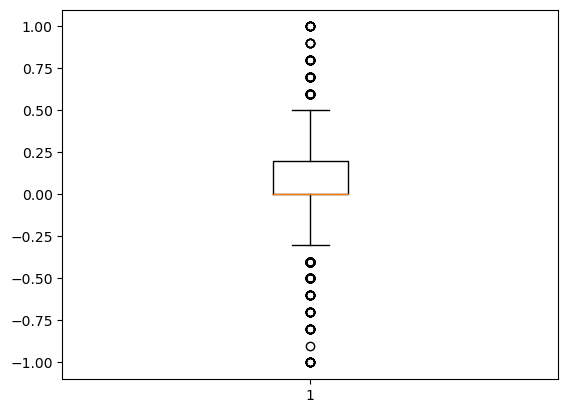

In [149]:
 plt.boxplot( df['sentiment'])

In [156]:
new_df = df[['Message', 'sentiment']].copy()

In [157]:
new_df.to_csv('sentiment_score.csv', index=False)

#### =================================
# VADER
#### =================================

In [158]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sent_analyzer = SentimentIntensityAnalyzer()

In [212]:
# Read the data set
sentiment_data = pd.read_csv('sentiment_score.csv')
sentiment_data.head(5)

,Message,sentiment
0,ireland better thought?,0.5
1,actually pretty good compare u south east asia...,0.5
2,"anyone remember journalist used go government,...",-0.1
3,better compare country outstanding systems. ot...,0.4
4,"exactly, corporate journalism. guy reason, he'...",0.0


In [213]:
sentiment_data['sentiment'] = round(sentiment_data['sentiment'],0)
sentiment_data['sentiment'].value_counts()

sentiment
 0.0    3126
 1.0     102
-1.0      62
Name: count, dtype: int64

In [214]:
sentiment_data['sentiment'] = sentiment_data['sentiment'].astype(int)

In [215]:
sentiment_data.groupby('sentiment').describe()

Message                                                            \
            count unique                                                top   
sentiment                                                                     
-1             62     61  yes definitely worst ever travelled to, airpor...   
 0           3118   2886                                          [deleted]   
 1            102     98                                    rome. know good   

                
          freq  
sentiment       
-1           2  
 0          75  
 1           2

In [216]:
sentiment_data = sentiment_data.drop_duplicates()
sentiment_data.groupby('sentiment').describe()

Message                                               
            count unique                                top freq
sentiment                                                       
-1             61     61                   pathetically bad    1
 0           2886   2886            ireland better thought?    1
 1             98     98  lol what? airport fly into? stay?    1

In [217]:
sentiment_data = sentiment_data.dropna()

In [218]:
def format_data(data):

    last_col = str(data.columns[0])
    first_col = str(data.columns[-1])

    data.rename(columns = {last_col: 'sentiment_text', first_col: 'polarity'}, inplace=True) 

    # Change 0, 2, 4 to negative, neutral and positive
    labels = {-1: 'negative', 0: 'neutral', 1: 'positive'}
    data['polarity'] = data['polarity'].map(labels)

    # Get only the two columns
    return data[['sentiment_text', 'polarity']]
    print (first_col)

In [220]:
data = format_data(sentiment_data)
data.head()

,sentiment_text,polarity
0,ireland better thought?,neutral
1,actually pretty good compare u south east asia...,neutral
2,"anyone remember journalist used go government,...",neutral
3,better compare country outstanding systems. ot...,neutral
4,"exactly, corporate journalism. guy reason, he'...",neutral


In [221]:
def format_output(output_dict):
  
  polarity = "neutral"

  if(output_dict['compound'] >= 0.05):
    polarity = "positive"

  elif(output_dict['compound'] <= -0.05):
    polarity = "negative"

  return polarity

def predict_sentiment(text):
  
  output_dict =  sent_analyzer.polarity_scores(text)
  return format_output(output_dict)

In [222]:
data["vader_prediction"] = data["sentiment_text"].apply(predict_sentiment)

In [223]:
data.sample(5)

,sentiment_text,polarity,vader_prediction
2636,regulator keep announcing new route fine opera...,neutral,negative
236,"1.6 diesel mid size panel van, i've spent tota...",neutral,negative
3054,"dedicated going specifically match? (yeah, tra...",neutral,positive
1323,“dublin worst capital europe”,negative,negative
2382,think it’s coming. everything city/country tak...,neutral,negative


## VADER Performance on the Dataset.


In [224]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(data['polarity'], data['vader_prediction'])

print("Accuracy: {}\n".format(accuracy))

# Show the classification report
print(classification_report(data['polarity'], data['vader_prediction']))

Accuracy: 0.3018062397372742

              precision    recall  f1-score   support

    negative       0.06      0.84      0.11        61
     neutral       0.98      0.27      0.42      2886
    positive       0.07      0.91      0.12        98

    accuracy                           0.30      3045
   macro avg       0.37      0.67      0.22      3045
weighted avg       0.94      0.30      0.41      3045



# Bag of Words Vectorization-Based Models
In the two approaches, Bag of words and Vader, we have simply used Python libraries to perform sentiment analysis. Now we will discuss an approach wherein we train our own model for the task. The steps involved in performing sentiment analysis using the Bag of Words Vectorization method are as follows

Pre-Process the text of training data (Text pre-processing involves Normalization, Tokenization, Stopwords Removal, and Stemming/Lemmatization.)

Create a Bag of Words for the pre-processed text data using the <b>Count Vectorization</b> or <b>TF-IDF Vectorization</b> approach.
Train a suitable classification model on the processed data for sentiment classification.

## Code for Sentiment Analysis using Bag of Words Vectorization Approach:

To build a sentiment analysis model using the BOW Vectorization Approach we need a labeled dataset. As stated earlier, the dataset used for this demonstration has been obtained from Kaggle. We have simply used sklearn’s count vectorizer to create the BOW. After, we trained a Multinomial Naive Bayes classifier, for which an accuracy score of 0.84 was obtained.

In [227]:
df = data[['sentiment_text', 'vader_prediction']].copy()
df.rename(columns={'sentiment_text': 'Sentence', 'vader_prediction': 'Sentiment'}, inplace=True)

In [229]:
# Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv    = CountVectorizer(stop_words = 'english',ngram_range = (1, 1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(df['Sentence'])

text_counts

C:\Users\dmitri.iolchin\AppData\Local\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<3045x7845 sparse matrix of type '<class 'numpy.int64'>'
	with 50507 stored elements in Compressed Sparse Row format>

In [230]:
#Splitting the data into trainig and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, df['Sentiment'], test_size=0.25, random_state=5)

In [231]:
text_counts.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((3045, 7845), (2283, 7845), (762, 7845), (2283,), (762,))

In [232]:
# Training the model
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

# Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracuy Score: ",accuracy_score)

Accuracuy Score:  0.5590551181102362
